# Evaluation of the Baseline Models with and without dynamic padding

In [1]:
import sys

# Append the directory containing the src folder to sys.path
sys.path.append('/Users/lars/Documents/test/')

In [2]:
import pickle
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
from src.data.data_manager import data_loader
from src.visualization.evaluation import plot_loss_accuracy_comparison, calculate_average_metrics, plot_average_metrics, tokenize_and_calculate_lengths, calculate_average_batch_lengths

/Users/lars/Documents/test/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#Path variables for datasets
directory = "/Users/lars/Documents/Uni/Masterarbeit/Online_Process_Concept_Drift"
path_raw = "/data/raw/"
path_interim = "/data/interim/"
path_processed = "/data/processed/"

In [5]:
# Filepath to all history files
file_paths = {
    'static_bert_helpdesk': '/Users/lars/Documents/test/models/models_pretrained/history_helpdesk.pkl',
    'static_bert_bpic2012': '/Users/lars/Documents/test/models/models_pretrained/history_bpic2012.pkl',
    'static_bert_bpic2018': '/Users/lars/Documents/test/models/models_pretrained/history_bpic2018.pkl',
    'static_longformer_helpdesk': '/Users/lars/Documents/test/models/models_pretrained/history_helpdesk_long.pkl',
    'static_longformer_bpic2012': '/Users/lars/Documents/test/models/models_pretrained/history_bpic2012_long.pkl',
    'dynamic_bert_helpdesk': "/Users/lars/Documents/test/models/models_pretrained2/models_pretrained/histories/dynamic_bert_helpdesk_history.pkl",
    'dynamic_bert_bpic2012': "/Users/lars/Documents/test/models/models_pretrained2/models_pretrained/histories/dynamic_bert_bpic2012_history.pkl",
    'dynamic_bert_bpic2018': "/Users/lars/Documents/test/models/models_pretrained2/models_pretrained/histories/dynamic_bert_bpic2018_history.pkl",
    'dynamic_longformer_helpdesk': "/Users/lars/Documents/test/models/models_pretrained2/models_pretrained/histories/dynamic_longformer_helpdesk_history.pkl",
    'dynamic_longformer_bpic2012': "/Users/lars/Documents/test/models/models_pretrained2/models_pretrained/histories/dynamic_longformer_bpic2012_history.pkl"
}

# Load all histories into on dictionray
histories = {}
for key, path in file_paths.items():
    with open(path, 'rb') as file:
        histories[key] = pickle.load(file)

print(histories)

{'static_bert_helpdesk': {'loss': [0.7953119874000549, 0.6580520868301392, 0.6409521698951721, 0.6268112063407898, 0.613644003868103], 'accuracy': [0.8360531330108643, 0.8671726584434509, 0.8692219853401184, 0.8684629797935486, 0.8696015477180481], 'val_loss': [0.6017406582832336, 0.5915557146072388, 0.579470694065094, 0.5796663165092468, 0.5593796372413635], 'val_accuracy': [0.883778989315033, 0.8844919800758362, 0.8791443705558777, 0.883778989315033, 0.8852049708366394]}, 'static_bert_bpic2012': {'loss': [1.4353610277175903, 1.210790753364563, 1.1426522731781006, 1.0896415710449219, 1.0506670475006104], 'accuracy': [0.6841042041778564, 0.7144845724105835, 0.717705488204956, 0.7187973260879517, 0.7190839648246765], 'val_loss': [1.3499048948287964, 1.2763112783432007, 1.2240335941314697, 1.1916929483413696, 1.1543976068496704], 'val_accuracy': [0.6960929036140442, 0.6908104419708252, 0.6964260339736938, 0.695712149143219, 0.695712149143219]}, 'static_bert_bpic2018': {'loss': [0.7719523

---

## Plot the loss and accruacy for all models with dynamic padding

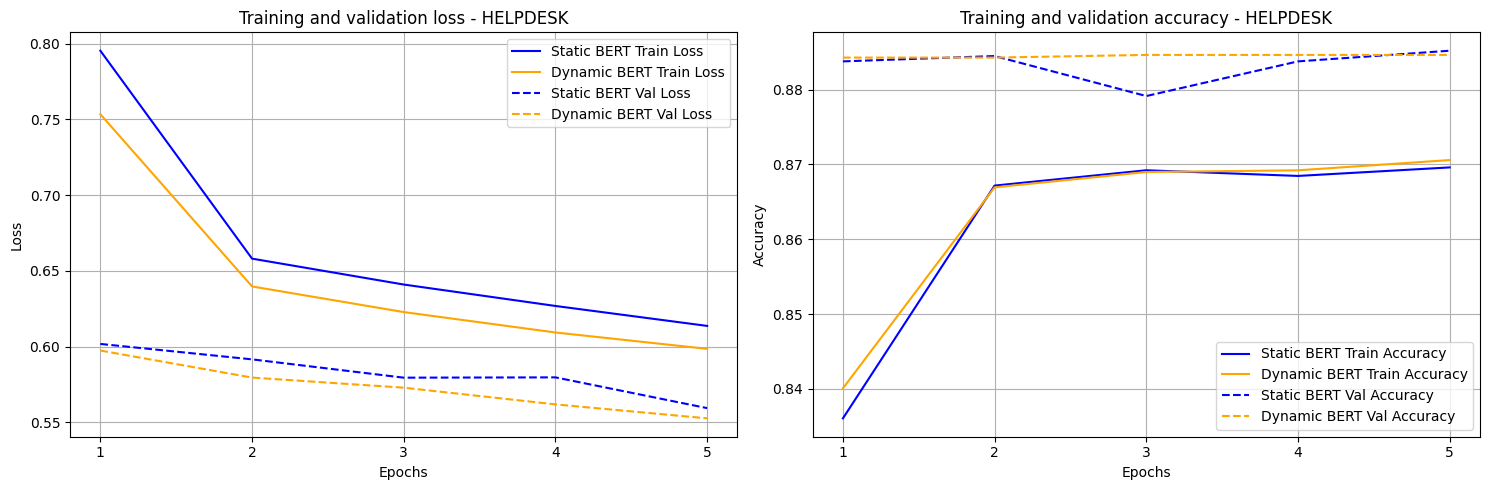

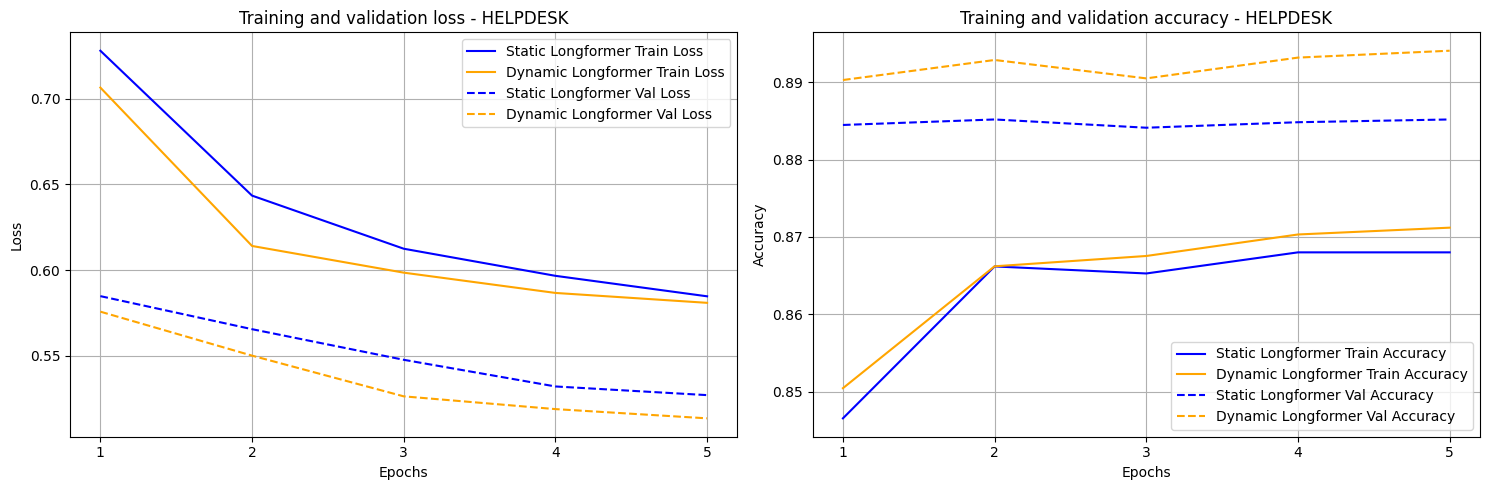

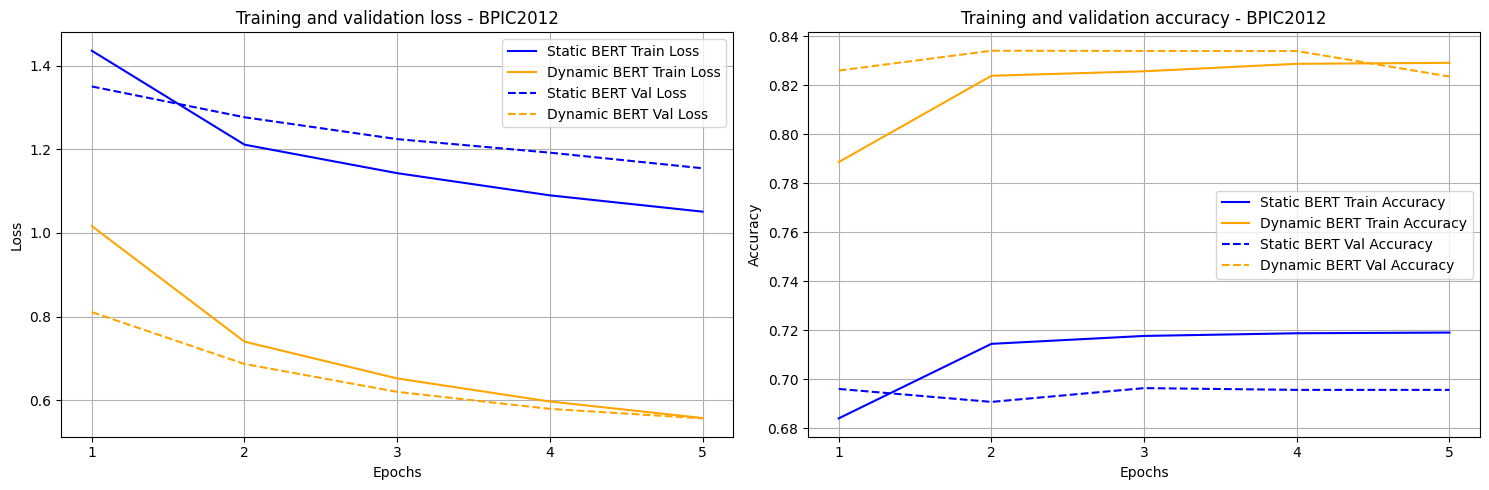

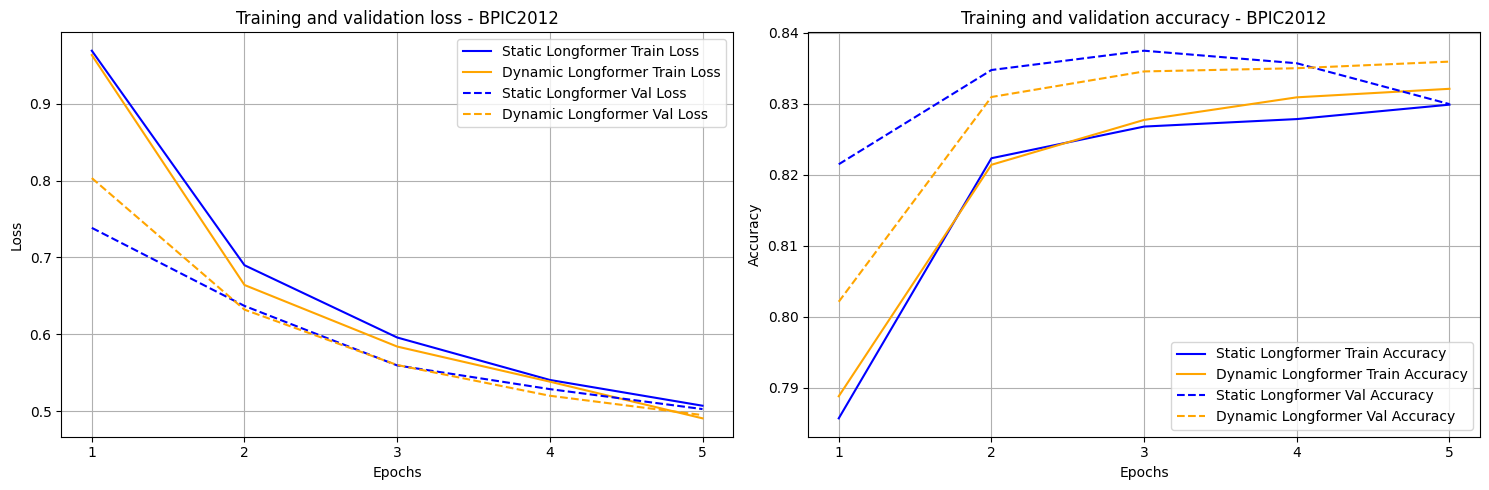

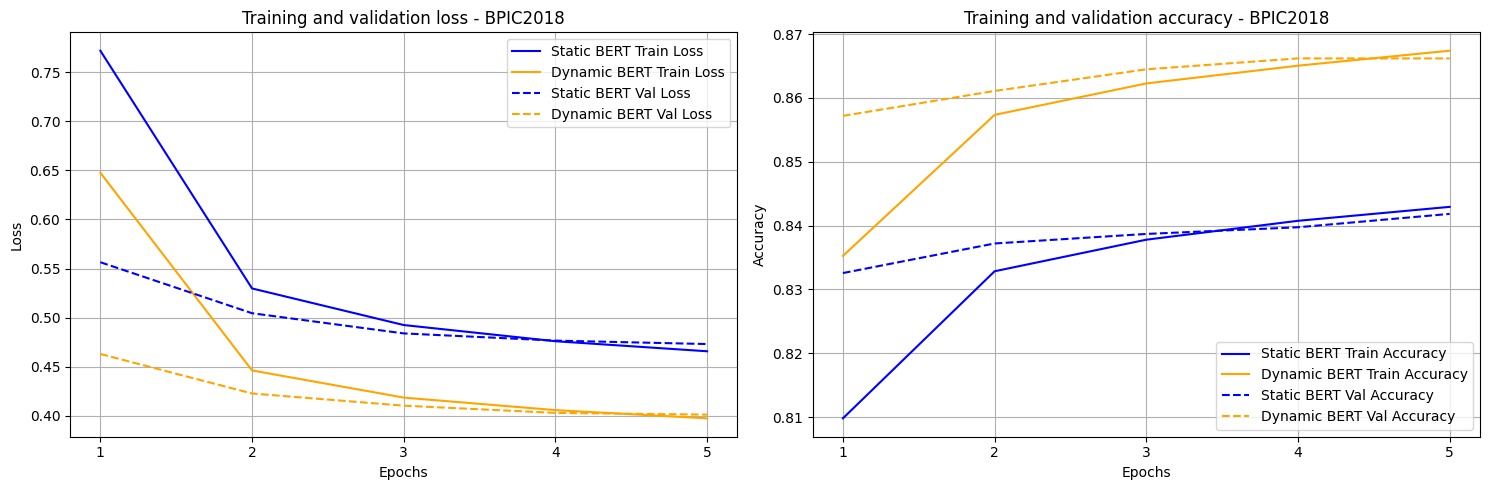

In [6]:
# List of all datasets the models were trained
datasets = ['helpdesk', 'bpic2012', 'bpic2018']

# Ploting loss and accuracy for all datasets
plot_loss_accuracy_comparison(histories, datasets, 5)

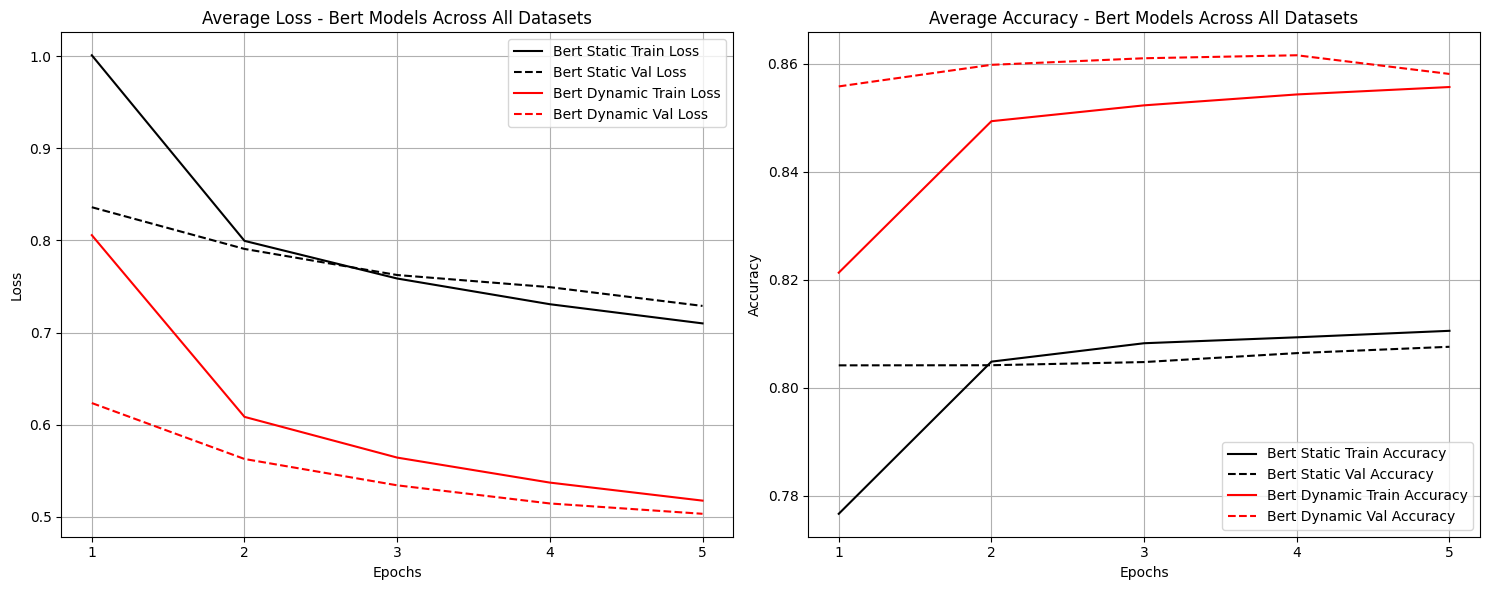

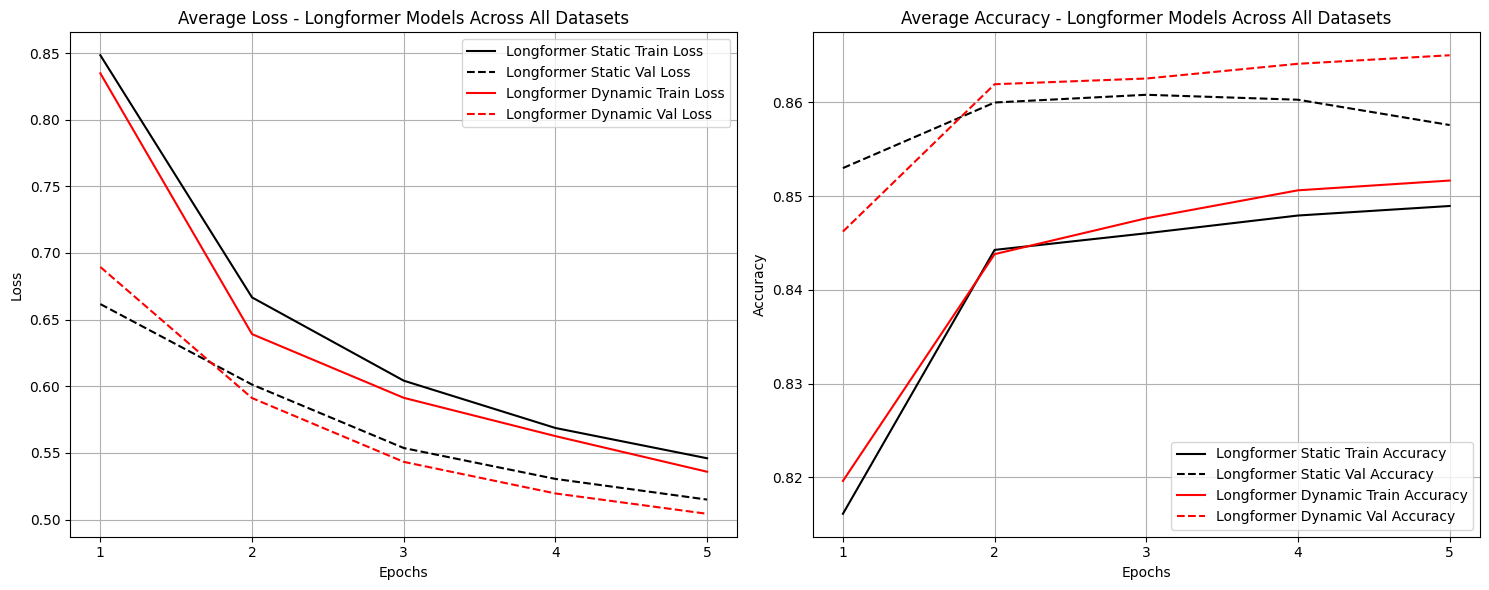

In [7]:
# Lists of datasets BERT and Longformer were trained on
bert_datasets = ['helpdesk', 'bpic2012', 'bpic2018']
longformer_datasets = ['helpdesk', 'bpic2012']

# Plot the average metrices for BERT and Longformer
plot_average_metrics(histories, bert_datasets, 'bert')
plot_average_metrics(histories, longformer_datasets, 'longformer')

---

## Sequence length per batch size

In [8]:
# Define batch size
batch_size = 16

### Helpdesk

In [9]:
train_tensor = data_loader(directory, path_interim, "Long_Helpdesk_train")
val_tensor = data_loader(directory, path_interim, "Long_Helpdesk_val")

/Users/lars/Documents/test/venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Average tokenized sequence length for training data: 12.626261859582543
Average tokenized sequence length for validation data: 12.566131907308378
Average tokenized sequence length per batch for training data: 12.625835358444714
Average tokenized sequence length per batch for validation data: 12.565357142857144


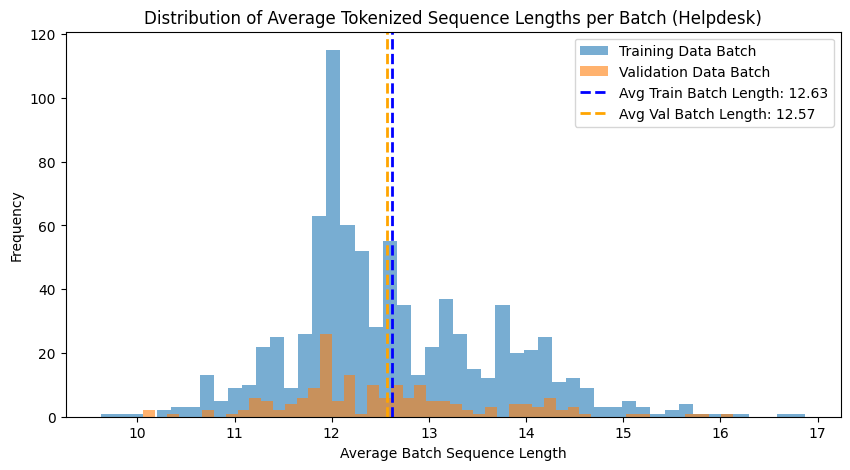

In [10]:
# Assuming train_tensor and val_tensor are pandas dataframes
train_tensor['Prefix_Trace'] = train_tensor['Prefix_Trace'].astype(str)
val_tensor['Prefix_Trace'] = val_tensor['Prefix_Trace'].astype(str)

# Tokenize the data and calculate sequence lengths
train_lengths = tokenize_and_calculate_lengths(train_tensor['Prefix_Trace'].tolist())
val_lengths = tokenize_and_calculate_lengths(val_tensor['Prefix_Trace'].tolist())

# Function to create batches and calculate average length per batch
train_avg_batch_lengths = calculate_average_batch_lengths(train_lengths, batch_size)
val_avg_batch_lengths = calculate_average_batch_lengths(val_lengths, batch_size)

# Calculate overall average lengths
average_train_length = sum(train_lengths) / len(train_lengths)
average_val_length = sum(val_lengths) / len(val_lengths)

average_train_batch_length = sum(train_avg_batch_lengths) / len(train_avg_batch_lengths)
average_val_batch_length = sum(val_avg_batch_lengths) / len(val_avg_batch_lengths)

print(f"Average tokenized sequence length for training data: {average_train_length}")
print(f"Average tokenized sequence length for validation data: {average_val_length}")
print(f"Average tokenized sequence length per batch for training data: {average_train_batch_length}")
print(f"Average tokenized sequence length per batch for validation data: {average_val_batch_length}")

# Plot the distribution of average batch sequence lengths
plt.figure(figsize=(10, 5))
plt.hist(train_avg_batch_lengths, bins=50, alpha=0.6, label='Training Data Batch')
plt.hist(val_avg_batch_lengths, bins=50, alpha=0.6, label='Validation Data Batch')
plt.axvline(average_train_batch_length, color='blue', linestyle='dashed', linewidth=2, label=f'Avg Train Batch Length: {average_train_batch_length:.2f}')
plt.axvline(average_val_batch_length, color='orange', linestyle='dashed', linewidth=2, label=f'Avg Val Batch Length: {average_val_batch_length:.2f}')
plt.xlabel('Average Batch Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Average Tokenized Sequence Lengths per Batch (Helpdesk)')
plt.legend()
plt.show()


### BPIC2012

In [11]:
train_tensor = data_loader(directory, path_interim, "Long_BPIC2012_train")
val_tensor = data_loader(directory, path_interim, "Long_BPIC2012_val")

/Users/lars/Documents/test/venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Average tokenized sequence length for training data: 94.52864737932217
Average tokenized sequence length for validation data: 114.00054365061388
Average tokenized sequence length per batch for training data: 94.52111040743087
Average tokenized sequence length per batch for validation data: 114.01373277737491


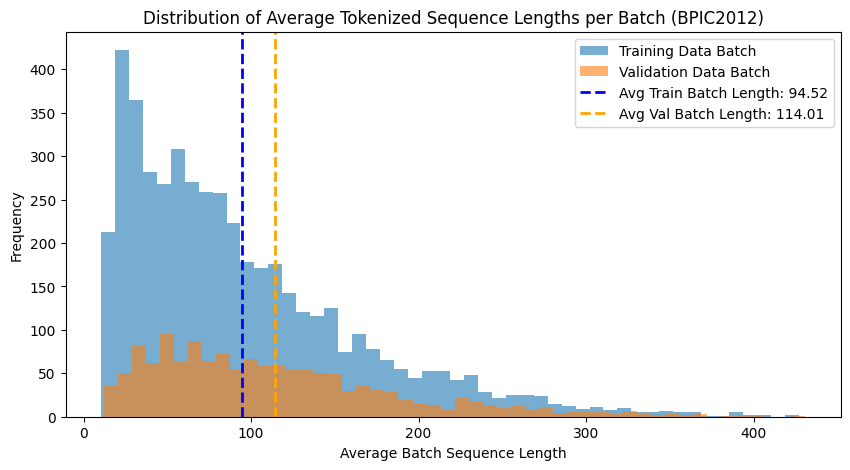

In [12]:
# Assuming train_tensor and val_tensor are pandas dataframes
train_tensor['Prefix_Trace'] = train_tensor['Prefix_Trace'].astype(str)
val_tensor['Prefix_Trace'] = val_tensor['Prefix_Trace'].astype(str)

# Tokenize the data and calculate sequence lengths
train_lengths = tokenize_and_calculate_lengths(train_tensor['Prefix_Trace'].tolist())
val_lengths = tokenize_and_calculate_lengths(val_tensor['Prefix_Trace'].tolist())

# Function to create batches and calculate average length per batch
train_avg_batch_lengths = calculate_average_batch_lengths(train_lengths, batch_size)
val_avg_batch_lengths = calculate_average_batch_lengths(val_lengths, batch_size)

# Calculate overall average lengths
average_train_length = sum(train_lengths) / len(train_lengths)
average_val_length = sum(val_lengths) / len(val_lengths)

average_train_batch_length = sum(train_avg_batch_lengths) / len(train_avg_batch_lengths)
average_val_batch_length = sum(val_avg_batch_lengths) / len(val_avg_batch_lengths)

print(f"Average tokenized sequence length for training data: {average_train_length}")
print(f"Average tokenized sequence length for validation data: {average_val_length}")
print(f"Average tokenized sequence length per batch for training data: {average_train_batch_length}")
print(f"Average tokenized sequence length per batch for validation data: {average_val_batch_length}")

# Plot the distribution of average batch sequence lengths
plt.figure(figsize=(10, 5))
plt.hist(train_avg_batch_lengths, bins=50, alpha=0.6, label='Training Data Batch')
plt.hist(val_avg_batch_lengths, bins=50, alpha=0.6, label='Validation Data Batch')
plt.axvline(average_train_batch_length, color='blue', linestyle='dashed', linewidth=2, label=f'Avg Train Batch Length: {average_train_batch_length:.2f}')
plt.axvline(average_val_batch_length, color='orange', linestyle='dashed', linewidth=2, label=f'Avg Val Batch Length: {average_val_batch_length:.2f}')
plt.xlabel('Average Batch Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Average Tokenized Sequence Lengths per Batch (BPIC2012)')
plt.legend()
plt.show()


### BPIC2018

In [13]:
train_tensor = data_loader(directory, path_interim, "Long_BPIC2018_train")
val_tensor = data_loader(directory, path_interim, "Long_BPIC2018_val")

/Users/lars/Documents/test/venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Average tokenized sequence length for training data: 62.183589747228886
Average tokenized sequence length for validation data: 62.48084358060713
Average tokenized sequence length per batch for training data: 62.18333087325287
Average tokenized sequence length per batch for validation data: 62.480200758773314


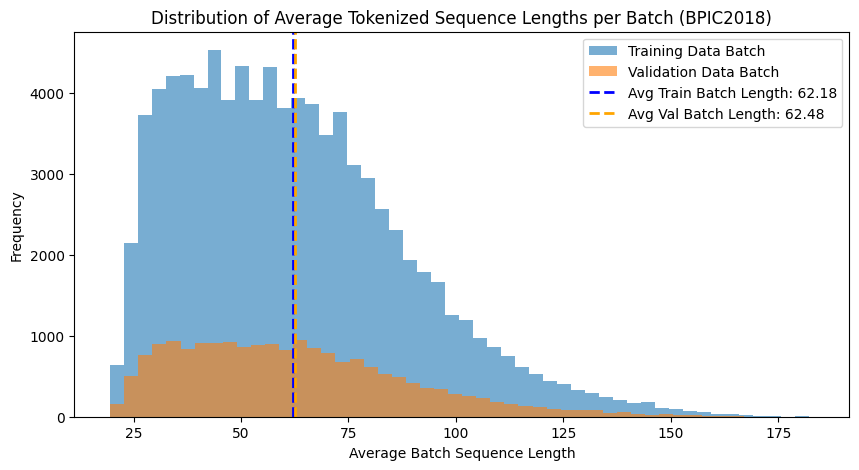

In [14]:
# Assuming train_tensor and val_tensor are pandas dataframes
train_tensor['Prefix_Trace'] = train_tensor['Prefix_Trace'].astype(str)
val_tensor['Prefix_Trace'] = val_tensor['Prefix_Trace'].astype(str)

# Tokenize the data and calculate sequence lengths
train_lengths = tokenize_and_calculate_lengths(train_tensor['Prefix_Trace'].tolist())
val_lengths = tokenize_and_calculate_lengths(val_tensor['Prefix_Trace'].tolist())

# Function to create batches and calculate average length per batch
train_avg_batch_lengths = calculate_average_batch_lengths(train_lengths, batch_size)
val_avg_batch_lengths = calculate_average_batch_lengths(val_lengths, batch_size)

# Calculate overall average lengths
average_train_length = sum(train_lengths) / len(train_lengths)
average_val_length = sum(val_lengths) / len(val_lengths)

average_train_batch_length = sum(train_avg_batch_lengths) / len(train_avg_batch_lengths)
average_val_batch_length = sum(val_avg_batch_lengths) / len(val_avg_batch_lengths)

print(f"Average tokenized sequence length for training data: {average_train_length}")
print(f"Average tokenized sequence length for validation data: {average_val_length}")
print(f"Average tokenized sequence length per batch for training data: {average_train_batch_length}")
print(f"Average tokenized sequence length per batch for validation data: {average_val_batch_length}")

# Plot the distribution of average batch sequence lengths
plt.figure(figsize=(10, 5))
plt.hist(train_avg_batch_lengths, bins=50, alpha=0.6, label='Training Data Batch')
plt.hist(val_avg_batch_lengths, bins=50, alpha=0.6, label='Validation Data Batch')
plt.axvline(average_train_batch_length, color='blue', linestyle='dashed', linewidth=2, label=f'Avg Train Batch Length: {average_train_batch_length:.2f}')
plt.axvline(average_val_batch_length, color='orange', linestyle='dashed', linewidth=2, label=f'Avg Val Batch Length: {average_val_batch_length:.2f}')
plt.xlabel('Average Batch Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Average Tokenized Sequence Lengths per Batch (BPIC2018)')
plt.legend()
plt.show()
